In [7]:
import warnings

warnings.filterwarnings("ignore")

import os
hf = r'../outputs/1.1_european_student_accommodation_crisis/'
os.makedirs(hf, exist_ok=True)

Research aimed to explore the topic, identifying major trends, challenges, and research gaps, in order to form scientific objectives and relevance of research for Berlin Case Study.

# 1.1 European Student Accommodation Crisis

In order to better understand the current state of research on European Student Accommodation Crisis topic, a comprehensive literature research was conducted. *Research aimed to explore the topic, identifying major trends, challenges, and research gaps, in order to form scientific objectives and relevance of research for Berlin Case Study.*

Type of Literature Research: Bibliographical Mapping

Tools: Zotero, Python, VOSviewer  

Topic: European Student Accommodation Crisis    

Period of the search: 2010-2025 

Area of search: European Union  

Academic Database: Scopus, Emerald, Google Scholar, TU Berlin Library   
    
Language: English   

## Literature Review Type

Bibliometric analysis is defined as “a part of scientometrics for utilising mathematical and statistical methods to analyse scientific activities in a research field” (Louarn et al., 2025). Thus, bibliographical mapping can be seen as a structured, data-driven approach for organising exciting knowledge regarding the selected topic. It can be applied to vast interdisciplinary literature, developing structured networks determined by keywords, co-citations, bibliometrics coupling, and direct citation analysis. This kind of approach matches with the overall aim to introduce innovative and structured analytical methods in urban design research. The methodology followed in review type comprises four stages: data collection, eligibility analysis, general descriptive and content analysis. (Louarn et al., 2025).  

## Limitations 

In the bibliometric analyses, certain limitations were set, which should be taken into account when interpreting the results. Firstly, document type was limited to ‘journal article’ and ‘book section’ to avoid the double-collecting of similar research papers. However, during the collecting process ‘reports’ were added as a grey literature sources. Secondly, the search was limited to articles written in English. Thirdly, the search area was initially limited to Germany, which was considered an especially narrow approach. Subsequently, the search area was extended to the European Union, which provided a more comprehensive view of the problem. Last but not least, the period of search was limited to 2010-2025 years, during which the governmental student accommodation availability rate in Germany was no more than 10% (Student Housing in Germany Statistical Overview, 2023). Those limitations assist in focusing on research that is immediately connected with the Student Housing Crisis in Berlin and retain only relevant information. 

## Set Up

Import Libraries 

In [8]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point

Colors

In [9]:
colors = ["#FAE1DD", "#FCD5CE", "#FEC5BB", "#F8AD9D", "#F4978E", "#F08080"]

Font

In [10]:
plt.rcParams["font.family"] = "Helvetica"

## Data Mining

The literature collection was conducted in June 2025 using three academic databases: Scopus, Emerald, Google Scholar and TU Berlin Library as a grey literature source. The search terms was organised in five preliminary clusters:  
    
1. Student Housing Market Terms: `student housing` OR `student accommodation` OR `dormitory` OR `Wohnheim` OR `affordable housing`  
2. Policy: `housing crisis` OR `rental market` OR `real estate investment` OR `financialization of housing`     
3. Urban Design Terms: `urban displacement` OR `studentification` OR `gentrification` OR `social housing` OR `urban periphery`  
4. Geographic Terms: `Berlin` OR `Germany` OR `EU` OR `European Union`  
5. Demographic Terms: `international students` OR `Erasmus students` OR `student mobility`  
    
The search resulted in a total of 50 articles from the four data sources, which serve as an initial orientation and provide a conceptual foundation for European Student Accommodation Crisis topic.

In [11]:
file_path = '../inputs/1.1_european_student_accommodation_crisis/literature_review_list.json'

# Load the JSON data
with open(file_path) as file:
    data = json.load(file)

# Extract items (journal articles and attachments) from the JSON
items = data.get('items', [])

# Convert the items into a DataFrame
df = pd.json_normalize(items)

In [12]:
columns_to_drop = ['version', 'language', 'libraryCatalog', 'accessDate', 'callNumber', 'shortTitle', 'publisher', 'ISBN', 'edition', 'institution', 'bookTitle', 'place', 'numPages', 'series', 'seriesNumber', 'seriesTitle', 'issue', 'dateAdded', 'dateModified', 'uri', 'attachments', 'notes', 'citationKey', 'itemID', 'itemKey', 'libraryID', 'select', 'abstractNote' ]

# Drop the columns (inplace=True modifies the original DataFrame)
df.drop(columns=columns_to_drop, inplace=True)

In [13]:
df = df.rename(columns={
    'archiveLocation': 'study_area',
    'rights': 'data_source', 
    'extra': 'method_of_study'
})

df['itemType'] = df['itemType'].replace({
    'bookSection': 'book section',
    'journalArticle': 'journal article',
    'book': 'book section',
})

df['method_of_study'] = df['method_of_study'].replace({
    'quantitative study': 'Quantitative Study',
    'qualitative study': 'Qualitative Study',
    'mixed-methods study': 'Mixed-Methods Study'
})

## General Descriptive Analysis

**Time Series**

The Study Period (2010-2025) has seen steady growth in publication trends (Figure XX). Between 2012 and 2021, the average annual number of publications was 2. In comparison, between 2021 and 2025 average publications number of per ear was 4 times higher - approximately 8 publications per year. In 2024, the number of annual publications was eight times as many as those published in 2014. The regular growth in the number of publications could be explained by the increasing acknowledgment of the importance of student housing crisis. Moreover, the number of articles related to student housing market regulations increased over the past 5 years. This could be seen as a part of the solution to the student housing crisis. Thus, providing new approaches to student housing, regulating the market, and recognising the right of students to social housing be taken into account in forming a theoretical framework.

In [14]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'coerce' will set invalid dates to NaT

# Set 'date' as the index
df.set_index('date', inplace=True)

# Sort by the date index
df = df.sort_index()

publication_counts = df.resample('Y').size() 

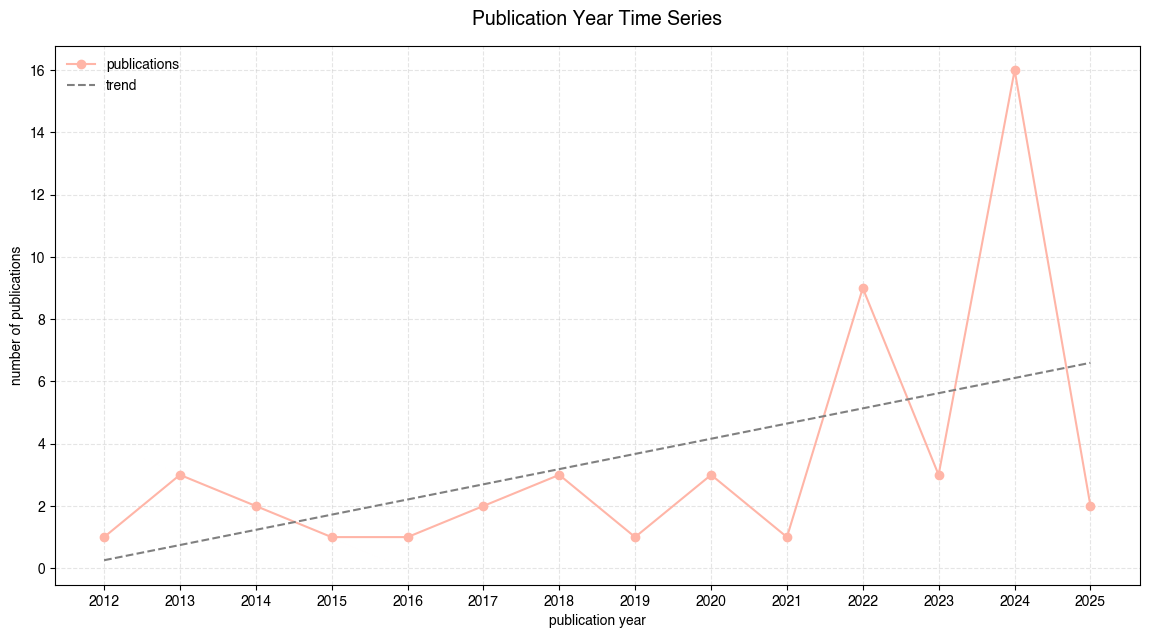

In [15]:
fig, ax = plt.subplots(figsize=(14, 7)) 
plt.plot(publication_counts.index, publication_counts.values, marker='o', linestyle='-', color=(255/255, 181/255, 167/255), label='publications')

# Add a main trend line
z = np.polyfit(range(len(publication_counts)), publication_counts.values, 1)
p = np.poly1d(z)
plt.plot(publication_counts.index, p(range(len(publication_counts))), linestyle='--', color='gray', label='trend')

# Labels and title
plt.xlabel("publication year")
plt.ylabel("number of publications")
plt.title("Publication Year Time Series", fontsize=14, pad=15, fontweight='bold')
plt.grid(True, color='#cccccc', linestyle='--', alpha=0.5)

# Set x-axis labels from 2012 to 2025
plt.xticks(pd.date_range(start='2012', end='2026', freq='Y'), [str(year) for year in range(2012, 2026)])

# Add legend
plt.legend(loc='upper left', frameon=False)

save_path = os.path.join(hf, "Publication Year Time Series.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

*Figure XX. Publication Year Time Series*

**Publication Type Distribution**

Publication Type analysis depicts the dominance of peer-reviewed journal articles (74%) and book chapters (16%) with the strong academic foundation of the research field on student housing market and urban design. In contrast, the reports (10%), representing grey literature, offer valuable insights from policy institutions and housing organisations. Although non-academic, these sources provide empirical evidence and real-world perspectives that bridge the gap between theory and practice. The combination of academic and grey literature thus ensures a balanced and multidimensional understanding of the student housing crisis, where data-driven analysis is informed both by academic research and applied policy contexts. 

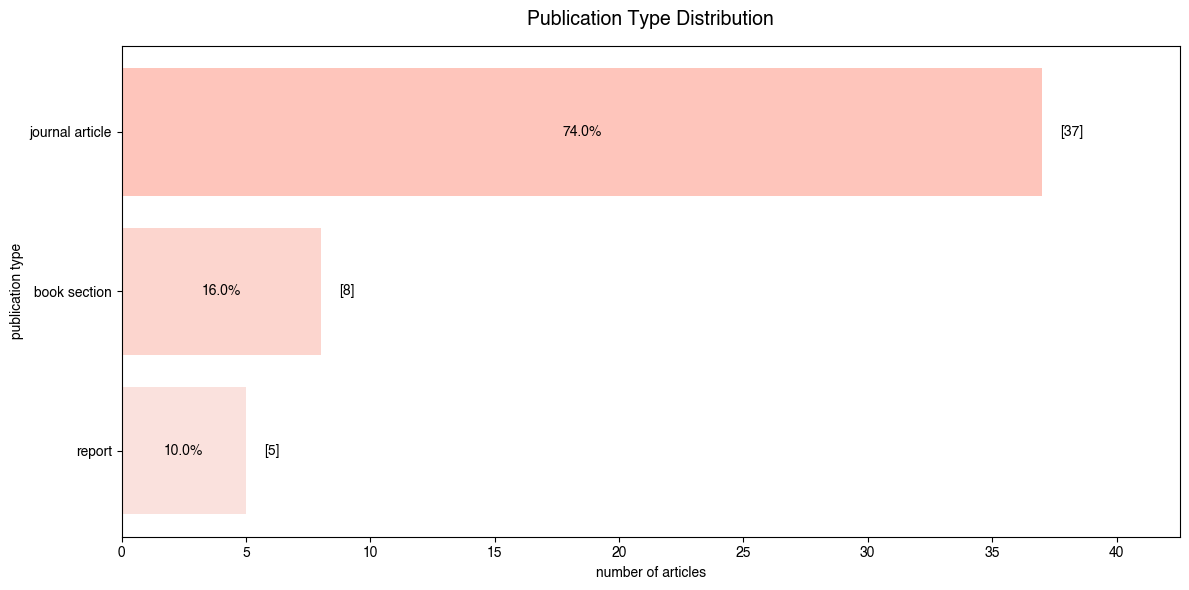

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
value_counts = df['itemType'].value_counts().sort_values(ascending=True)  # Sort by decreasing value counts
total = value_counts.sum() 

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6)) 
bars = plt.barh(value_counts.index,
                value_counts.values,
                color=colors[:len(value_counts)])

# Add 15 % breathing room to the right of the longest bar
plt.xlim(0, value_counts.max() * 1.15)

# Set custom x-axis labels (0, 5, 10, 15, 20)
x_ticks = np.arange(0, 40.5, 5)  # Generate ticks from 0 to 20 with step 5
plt.xticks(x_ticks)

# Annotate bars
for bar, value in zip(bars, value_counts.values):
    pct = 100 * value / total
    # Count to the right of the bar
    plt.text(bar.get_width() + value_counts.max() * 0.02,  # A little to the right of the bar
             bar.get_y() + bar.get_height() / 2,          # Center of the bar
             f"[{value}]",
             ha='left', va='center', fontsize=10, color='black')
    # Percentage inside the bar
    plt.text(bar.get_width() / 2,  # Inside the bar
             bar.get_y() + bar.get_height() / 2,
             f"{pct:.1f}%",
             ha='center', va='center', fontsize=10, color='black')

# Add title and labels
title = "Publication Type Distribution"
plt.title(title, fontsize=14, pad=15, weight='bold')
plt.xlabel("number of articles")
plt.ylabel("publication type")

save_path = os.path.join(hf, "Publication Type Distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Display the plot
plt.tight_layout()
plt.show()

*Figure XX. Publication Type Distribution*

**Method of Study Distribution**

Methods of Study (Figure XX) refer to the techniques and tools used in research to collect, analyse, and interpret data. Such methods can be broadly categorised into qualitative, quantitative, and mixed-method approaches. Qualitative study methods (29.2%) have a strong emphasis on understanding the social dynamics and subjective experiences, highlighting topics such as cultural diversity, moving abroad, and community living. Quantitative studies (33.3%) indicate a desire for evidence-based insights related to housing costs, student satisfaction, or demographic trends. However, the majority of studies are using mixed-method approaches with an emphasis on understanding the social processes within the data-driven framework. Thus, merging qualitative methods with quantitative ones is the most relevant approach to acsess the Student Hosing Crisis topic. 

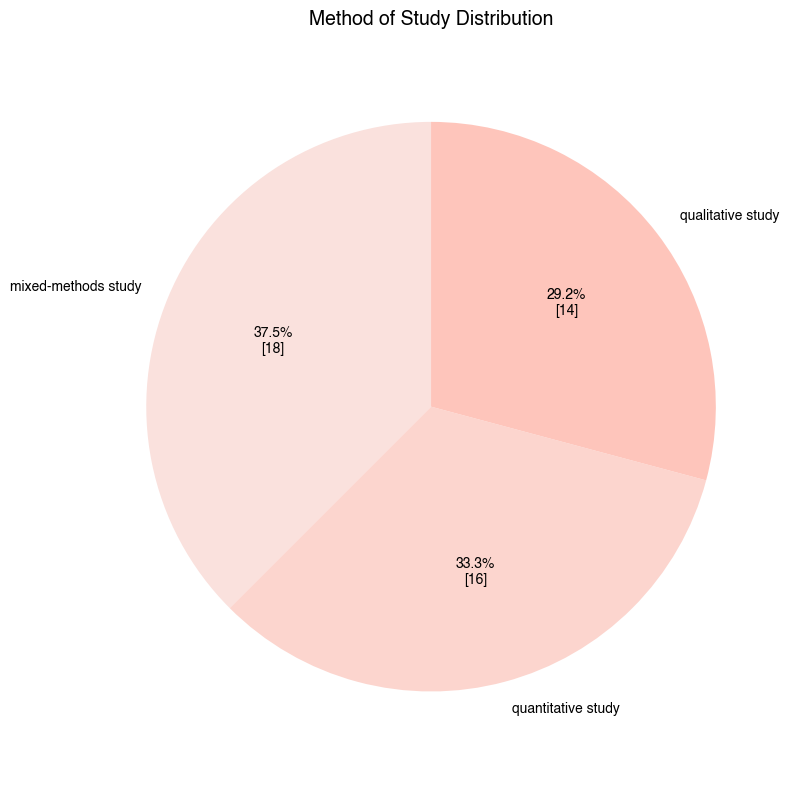

In [17]:
value_counts = df['method_of_study'].value_counts()
total = value_counts.sum()

labels = ['mixed-methods study', 'quantitative study', 'qualitative study']

def make_autopct(values):
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n[{count}]"
    return my_autopct

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8)) 
patches, texts, autotexts = plt.pie(
    value_counts,
    labels=labels,
    colors=colors[:len(value_counts)],
    autopct=make_autopct(value_counts),
    startangle=90
)

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')

plt.title("Method of Study Distribution",  fontsize=14, fontweight='bold')

save_path = os.path.join(hf, "Method of Study Distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

*Figure XX. Method of Study Distribution*

**Data Source Distribution**

During the data sourse distribution analysis (Figure XX), four primary data source categories were identified: numerical data (30.3%), social data (27.5%), literature review (25.7%), and other data (16.5%). The balance between four categories reflects the interdisciplinary nature of the Student Crisis topic. Statistics, institutional records, market data provide measurable insights into housing, while social data (surveys, interviews, case studies, street observations) capture students’ lived experiences and perceptions. The strong representation of literature sources ensures theoretical grounding in urban design, economics and sociology.

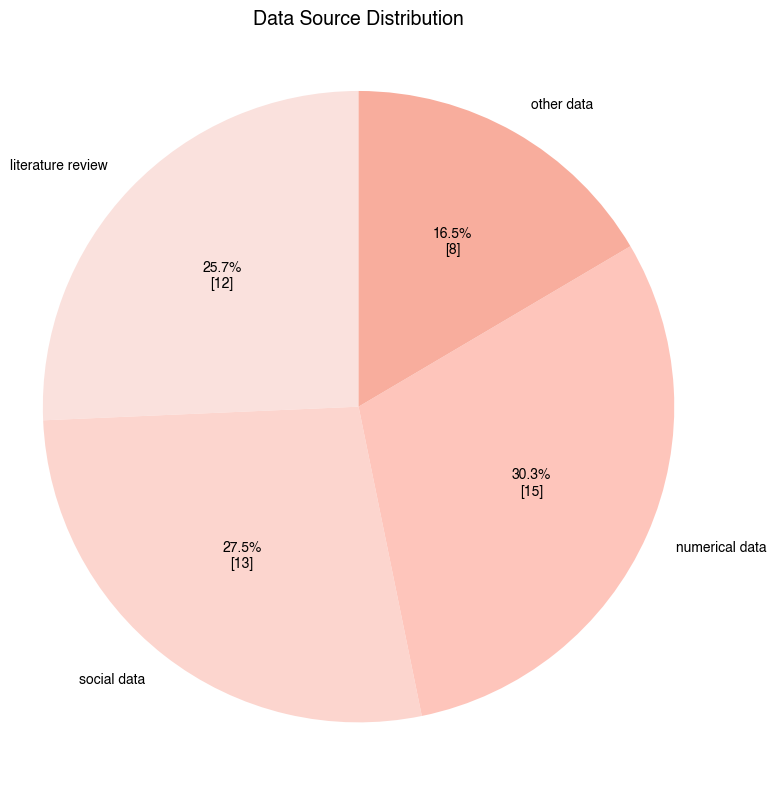

In [18]:
# Normalize the 'Data Source Distribution' column using get_dummies
normalized_data = df['data_source'].str.get_dummies(sep=', ')

# Ensure all required columns are present (even if they don't exist in the data)
categories = ['literature review', 'social data', 'numerical data', 'other data']
for category in categories:
    if category not in normalized_data.columns:
        normalized_data[category] = 0  # Add missing columns with default value 0

# Concatenate the normalized data with the original DataFrame
df = pd.concat([df, normalized_data[categories]], axis=1)

source_distribution = df[['literature review', 'social data', 'numerical data', 'other data']].sum()

labels = ['literature review', 'social data', 'numerical data', 'other data']

def make_autopct(values):
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n[{count}]"
    return my_autopct

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8)) 
patches, texts, autotexts = plt.pie(
    source_distribution,
    labels=labels,
    colors=colors[:len(source_distribution)],
    autopct=make_autopct(source_distribution),
    startangle=90
)

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')

plt.title("Data Source Distribution", fontsize=14, weight='bold')

save_path = os.path.join(hf, "Data Source Distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Display the plot
plt.tight_layout()
plt.show()

*Figure XX. Data Source Distribution*

**Studies Areas**

In selected literature, 46 cities were mentioned as case studies (Table XX). The most frequently mentioned cities are Berlin, Hamburg, Stockholm and Vienna, all of which have populations of over 1.5 million. This can be explained by the fact that the more people live in a city, the easier it is to obtain a representative sample for social research. Large cities also tend to have more open statistics and data. 

In [19]:
data = [
    "Berlin", "Berlin", "Berlin, Hamburg, Stuttgart, Stockholm", "EU", "Ghana", "Lombardy, Sicily",
    "Berlin, Tehran, Sydney, Louvain La Neuve", "Berlin, London", "Berlin", "Berlin",
    "Berlin, Prague, Stockholm, Amsterdam", "Berlin, New York", "Vienna", "NaN", "EU",
    "Berlin, Hamburg, Stockholm, Gothenburg", "EU", "Berlin, Brandenburg", "EU", "EU",
    "Berlin", "Groningen, Rottleberode", "Berlin, Vienna", "Barcelona, Paris, Montréal, Beja",
    "Berlin, Podsdam, Brandenburg", "EU", "Berlin", "Aachen", "Goettingen",
    "Berlin, Munich, Hamburg, Stuttgart, Hanover, Wiesbaden, Saarbrücken", "Berlin", "EU",
    "Moscow, Berlin", "Berlin, Munich, Hamburg, Oldenburg, Bremen", "Hanover, Brighton, Phoenix",
    "UK", "Berlin, Barcelona, Vienna", "Groningen", "Berlin", "Aachen",
    "Berlin, Dresden, Leipzig, Rostock, Magdeburg, Trier, Frankfurt Munich, Hamburg, Cologne, Düsseldorf, Stuttgart",
    "Berlin, Hamburg", "Konstanz", "Berlin, Como, Newcastle upon Tyne"
]

# Combine all text into a single string and split into individual cities
cities = [city.strip() for location in data for city in str(location).split(',')]

# Remove 'EU' and 'UK' and convert to lowercase (optional)
cities = [city for city in cities if city not in ['EU', 'UK']]

# Count unique cities
city_counts = pd.Series(cities).value_counts().reset_index()
city_counts.columns = ['city_name', 'count']

# Add longitude and latitude for each city (in EPSG:25833 CRS)
city_coords = {
    'Berlin': (13.404954, 52.520008),
    'Hamburg': (9.993682, 53.551086),
    'Stuttgart': (9.164927, 48.779349),
    'Stockholm': (18.068581, 59.329323),
    'Ghana': (-0.186964, 5.794722),
    'Lombardy': (9.845243, 45.586711),
    'Sicily': (13.726664, 37.599669),
    'Tehran': (51.387832, 35.689198),
    'Sydney': (151.209344, -33.917347),
    'Louvain La Neuve': (4.617157, 50.669791),
    'London': (-0.127758, 51.507351),
    'Prague': (14.437800, 50.075538),
    'Amsterdam': (4.904139, 52.367573),
    'New York': (-74.005974, 40.714268),
    'Vienna': (16.373819, 48.208174),
    'Gothenburg': (11.974560, 57.708874),
    'Brandenburg': (13.406675, 52.411068),
    'Groningen': (6.566502, 53.219383),
    'Rottleberode': (10.937416, 51.516919),
    'Barcelona': (2.158990, 41.385064),
    'Paris': (2.352222, 48.856614),
    'Montréal': (-73.567256, 45.501689),
    'Beja': (-7.843390, 38.018283),
    'Podsdam': (13.058500, 52.401499),
    'Aachen': (6.083887, 50.775346),
    'Goettingen': (9.932258, 51.533461),
    'Munich': (11.581981, 48.135125),
    'Hanover': (9.732010, 52.375892),
    'Wiesbaden': (8.242082, 50.078218),
    'Saarbrücken': (6.996932, 49.240157),
    'Moscow': (37.617300, 55.755826),
    'Oldenburg': (8.213511, 53.142368),
    'Bremen': (8.801694, 53.079296),
    'Brighton': (-0.137163, 50.822529),
    'Phoenix': (-112.074036, 33.448376),
    'Konstanz': (9.177020, 47.663743),
    'Como': (9.083333, 45.809098),
    'Newcastle upon Tyne': (-1.617780, 54.978252),
    'Dresden': (13.737262, 51.050409),
    'Leipzig': (12.373075, 51.339695),
    'Rostock': (12.134415, 54.092440),
    'Magdeburg': (11.626562, 52.131589),
    'Trier': (6.633333, 49.750000),
    'Frankfurt': (8.682127, 50.110924),
    'Cologne': (6.960279, 50.937531),
    'Düsseldorf': (6.773456, 51.227741),
    'Stuttgart': (9.180013, 48.785079)
}

# Add coordinates to the DataFrame
city_counts['longitude'] = city_counts['city_name'].map(lambda x: city_coords.get(x, (None, None))[0])
city_counts['latitude'] = city_counts['city_name'].map(lambda x: city_coords.get(x, (None, None))[1])

# Remove cities with no coordinates (optional)
city_counts = city_counts.dropna(subset=['longitude', 'latitude'])

# Create Point geometry
city_counts['geometry'] = city_counts.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
city = gpd.GeoDataFrame(city_counts, crs='EPSG:4326')  # Convert to EPSG:4326 first
city = city.to_crs('EPSG:25833')  # Reproject to EPSG:25833

In [20]:
city.head(4)

,city_name,count,longitude,latitude,geometry
0,Berlin,24,13.404954,52.520008,POINT (391776.158 5820073.118)
1,Hamburg,6,9.993682,53.551086,POINT (168441.945 5945241.585)
2,Stockholm,3,18.068581,59.329323,POINT (674570.668 6580745.518)
3,Vienna,3,16.373819,48.208174,POINT (602066.671 5340350.73)


*Table XX. Literature Review Cities*

In [21]:
# Define output directory
od = r'../outputs/1.1_european_student_accommodation_crisis/city.gpkg'

city.to_file(od, driver="GPKG")  

Spatial Distribution of Case Studies (Figure XX) shows geographical origin of the academic and empirical datasets used in the literature, highlighting that topic of European Student Accommodation Crisis is researched mainly in Western Europe (e.g., Germany, Austria, Netherlands) and Northern Europe (e.g., the UK, Scandinavia), while East Europe (e.g., Poland, Slovakia, Hungary) remains relatively under-researched. It is important to note that, since geographic search terms include “Germany”, the highest data density correlates with the frequency of mentions of Germany in search terms.

In the context of the student housing crisis, Germany serves not only as a subject of analysis, but also as a model for comparative European studies. For example, Berlin is compared with Vienna (Holm, Andrej et al., 2024), Prague, Stockholm, and Amsterdam (Wijburg and Aalbers, 2017), as well as other German cities such as Munich, Hamburg, Stuttgart, Hanover, Wiesbaden, and Saarbrücken (Mitze et al., 2015). 


![Figure xx. bla bla bla](../outputs/1.1_european_student_accommodation_crisis/countries_map.png) 
    
*Figure XX. Spatial Distribution of Case Studies Across Europe*

This spatial distribution of Case Studies across Germany (Figure XX) underlines that Berlin’s housing challenge is embedded in broader German dynamics of socio-economic crisis. By choosing Berlin as a case study, research will not only analyse local challenges, but also contributes to the German discourse on urban housing justice.

![Figure xx. bla bla bla](../outputs/1.1_european_student_accommodation_crisis/germany_map.png) 

*Figure XX. Spatial Distribution of Case Studies Across Germany*

**Key Words Analysis**

Network analysis, created using VOSviewer, visualises the bibliographic relationships between recurring keywords in the student housing literature from 2010 to 2025. The central cluster — formed by searching keyswords `student housing`, `students`, `housing` and `Germany` — anchors the field. Peripheral nodes such as `gentrification`, `financialisation`, `studentification`, `displacment` show the expanding theoretical dimensions. In the same time social dimensions represented by `international students`, `discrimination`, `student needs`, `affordable housing`, keywords, highlighting the importance of students experience. Last but not least, student market represented by `urban housing policy`, `strategy`, `rent`, `housing prices`, `rent control`, `subsidised housing` keywords, emphasising that student housing is a trade objective. 

The colour gradient indicates the temporal evolution of the literature: earlier studies (2010–2015) focused on affordability and social equity, while more recent works (2020–2025) increasingly address financialisation, rent control, urban mobility and housing satisfaction in relation to international students.  

![Figure xx. bla bla bla](../outputs/1.1_european_student_accommodation_crisis/overlay_visualisation_frames.png)

*Figure XX. Time Overlay Network Visualisation*

Bibliographic mapping demonstrates that the research area has evolved from descriptive housing studies toward data-driven, policy-oriented analyses. It situates your work within an emerging scholarly effort to link spatial analytics, social data, and governance in tackling urban housing challenges.

## Trends 

Contemporary literature agrees that the housing affordability crisis in Europe is linked not only to demographic growth, but also to the financialisation of the housing sector and the declining role of the public sector.

In the case of Germany, it has been shown conclusively that, despite the myth of a ‘stable, non-financialised’ market, the country has followed its own path of financialisation through the privatisation of social housing and the growth of listed real estate investment trusts (Wijburg & Aalbers, 2017). The authors describe three waves of financialisation: from the failed liberalisation of housing loans to the mass transfer of municipal housing stock to private equity funds and the subsequent concentration of stock in the hands of large privat corporations (Vonovia, Deutsche Wohnen, etc.) (Wijburg & Aalbers, 2017). As a result, the German market has become the next frontline for global investment.

These trends are particularly noticeable in Berlin. According to the IBB Wohnungsmarktbericht 2024, the average cold rent offered in the city in 2024 reached EUR 15/m2, which is more than double the comparative rent according to Mietspiegel (EUR 7.21/m2) and represents a gap of around 118% — the largest among major German cities (Investitionsbank Berlin, 2024). At the same time, the rate of new housing construction is falling behind population growth, and the shortage is particularly severe in central areas.

In this context, students, young adults and migrants are the least protected. Student halls of residence cover only about 8% of students in Germany (Deutsches Studierendenwerk, 2024). European-wide data shows that one in four students spends more than 40% of their budget on housing (EUROSTUDENT, 2024).

Thus, international students are most vulnerable to the housing crisis: they are being pushed out of central areas, concentrated in the most marginal segments of the market (shared flats with 6-8 people per room, short-term contracts, illegal or semi-legal rentals) and have a disproportionately high rental burden.

## Challenges

Despite notable progress, the literature faces a number of limitations.

First, there is a lack of data and weak integration of sources. Many studies rely on local or one-off cases (Miessner, 2021; von Wittenhorst zu Sonsfeld & Beusker, 2024). Nationwide and Europe-wide studies (EUROSTUDENT, 2024) provide a valuable overview (e.g., the proportion of students spending >40% of their budget on housing), but rarely differentiate data by type of housing (dormitories vs. WGs vs. private rentals) and status (international vs. local students).

Secondly, a significant portion of the studies provide qualitative assessments without quantitative verification. For example, the housing affordability crisis is described through an array of questionnaire complaints and narratives (stress, fraud, language barriers), but is rarely accompanied by spatial modelling or econometric estimates of the impact on mobility participation. Even where quantitative analysis is available, patterns are not always systematised. Miessner (2021) and Avogo et al. (2022) identify important behavioural patterns (private landlords' focus on students), but do not link them to urban structure or patterns of student housing distribution.

Finally, most studies highlight the role of private actors (investors, landlords, platforms), but provide much less analysis of how the state and universities reproduce or moderate inequality through their decisions.

## Gaps

Based on the literature reviewed, several key gaps can be identified:

Lack of a comprehensive approach to universities and student housing.
Universities and Studentenwerke (student unions) are often viewed merely as background players (providers of dormitories) rather than active actors in the housing field. For example, the IBB report analyses the Berlin market in detail, but hardly highlights universities as a separate policy area (Investitionsbank Berlin, 2024).

Insufficient consideration of the role of the public sector in the current housing crisis for students and migrants. Although some authors emphasise that the abandonment of housing subsidies and the privatisation of municipal housing were key triggers of the crisis (Wijburg & Aalbers, 2017), there are still few studies that directly link the reduction in student accommodation/state programmes with the increased vulnerability of the student group in particular. Paradoxically, even in the discussion of social commons (Stoll, 2022), student housing is hardly mentioned, although logically it is a classic candidate for public ownership and democratic governance.

Most studies are either macro-level (national/European surveys) or micro-cases of individual student cities and campuses. There are no studies that systematically examine the spatial distribution of student and migrant housing in large cities (e.g., Berlin) at the planning district level. 

These gaps justify the need for research that examines student housing in conjunction with university structures and urban housing policy, uses spatial analysis (at the city and district level), and assesses how different management models (state/municipal, university, private, cooperative) affect the daily lives of students in different ways.